<class 'networkx.utils.decorators.argmap'> compilation 20:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


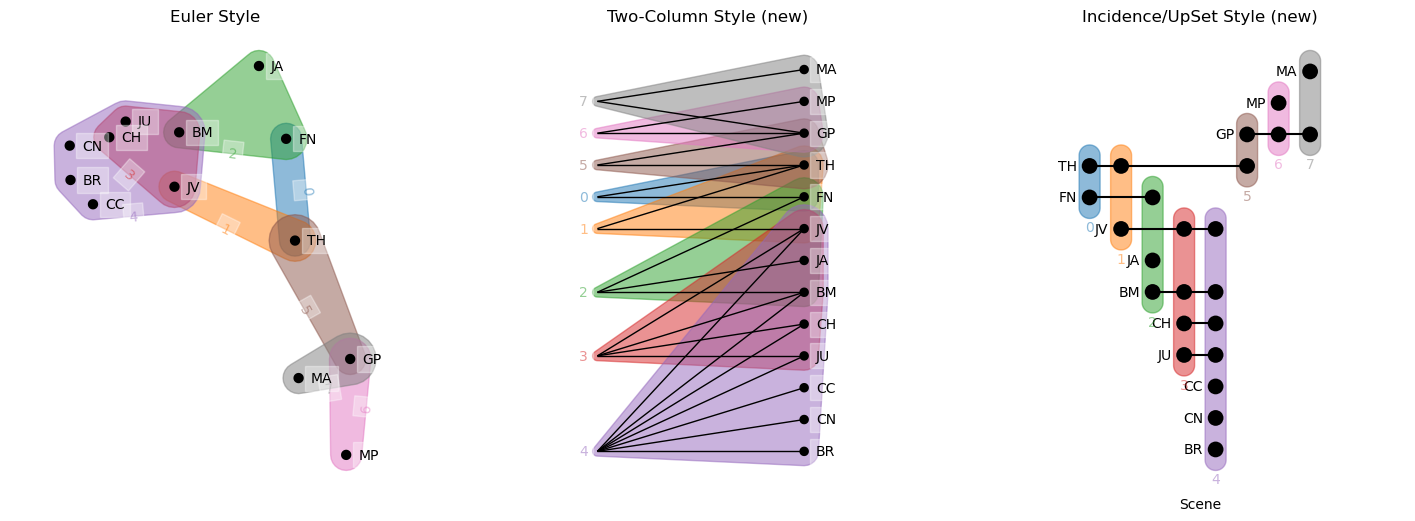

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import hypernetx as hnx
from hypernetx.drawing import draw_incidence
from hypernetx.drawing import draw_bipartite

from importlib import reload; reload(draw_incidence); reload(draw_bipartite)

scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

node_labels_kwargs={
    'fontsize': lambda v: 36 if v == 'JV' else 12
}

edge_color = lambda e: plt.cm.tab10(e)
lighter_edge_color = lambda e: edge_color(e) + np.array([0, 0, 0, -.5])

kwargs = {
    'edges_kwargs': {
        'edgecolors': edge_color,
        'facecolors': lighter_edge_color,
        'color': lighter_edge_color
    }
}

plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.title('Euler Style')
hnx.draw(H, **kwargs)

plt.subplot(132)
plt.title('Two-Column Style (new)')
draw_bipartite.draw_bipartite_using_euler(H, **kwargs)

plt.subplot(133)
plt.title('Incidence/UpSet Style (new)')
draw_incidence.draw_incidence_upset(
    H,
    edge_order = sorted(H.edges),
    edge_labels_on_axis=False,
    **kwargs
)
plt.xlabel('Scene');

# option to show labels on axis or on nodes
# basic tutorial on visualization, including bipartite
# advanced tutorial on encoding

/Users/aren438/projects/hypernetx/hypernetx/classes/hyp_view.py:136: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  return pd.concat([df, non_user_defined_properties]).loc[list(self.items)]
<class 'networkx.utils.decorators.argmap'> compilation 20:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 20:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 20:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 20:4: FutureWarning: laplacian_matrix will retu

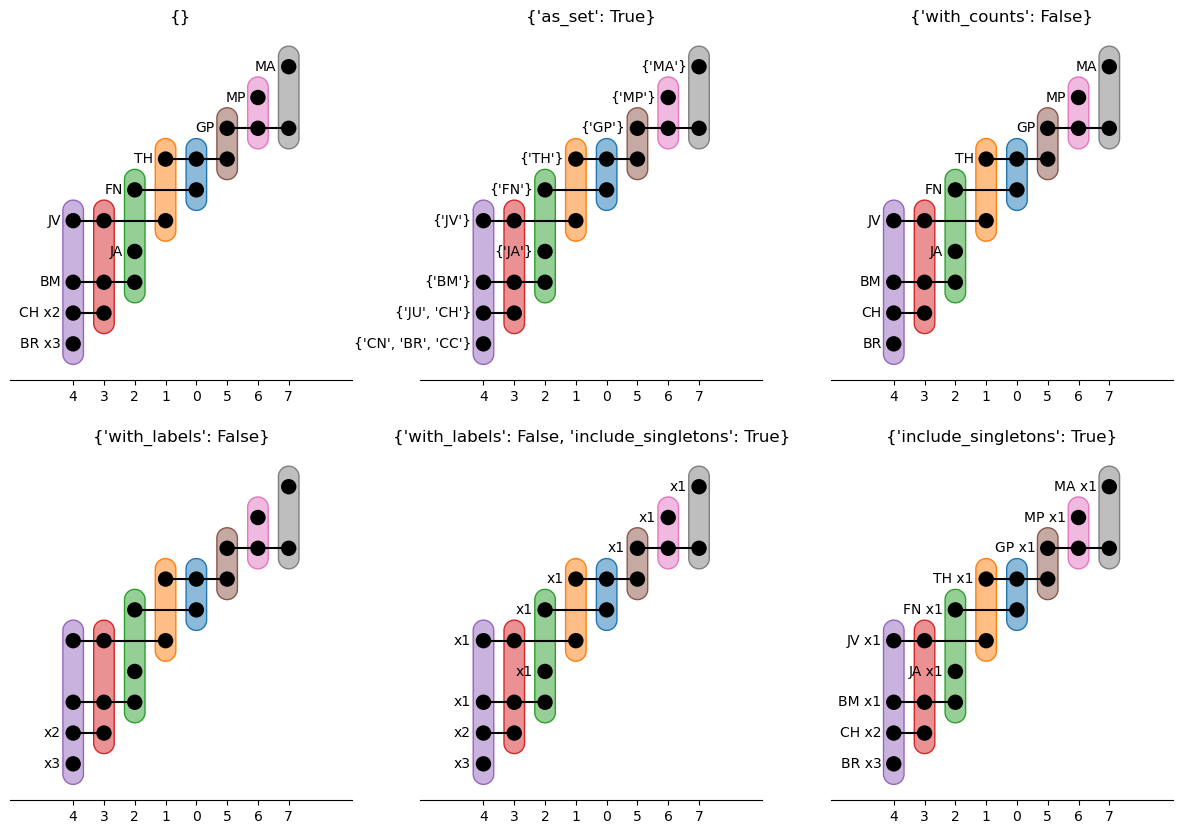

In [2]:
from hypernetx.drawing import util

Hc, eq = H.collapse_nodes(return_equivalence_classes=True)

kwargs_list = [
    dict(),
    dict(as_set=True),
    dict(with_counts=False),
    dict(with_labels=False),
    dict(with_labels=False, include_singletons=True),
    dict(include_singletons=True)
]

plt.figure(figsize=(15, 10))

pos = None
for i, kwargs in enumerate(kwargs_list):
    pos = draw_incidence.draw_incidence_upset(
        Hc,
        # pos=pos,
        node_labels=util.create_labels(eq, **kwargs),
        ax=plt.subplot(2, 3, i + 1),
        # return_pos=True
    )
    plt.title(str(kwargs))
